In [2]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import os
import scipy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def plot_sample(eeg_array, sample, ax, title=None):
    num_channels = eeg_array.shape[1]

    # Plot data on the specified subplot
    ax.plot(eeg_array[sample, :, :].T)
    ax.set_title(f"{title} - Sample {sample}")

In [4]:
folder_path = '../capped_data/data/walk_instruction_raw/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.mat')]
file_list.sort()

file_dict = {file.split('/')[-1][:-4]: index for index, file in enumerate(file_list)}

X_raw = []
Y_raw = []

for i, file in enumerate(file_list):
    x = scipy.io.loadmat(file)
    x = x['data']

    # x = x[:,:,:500]
    
    first_letter = file.split('/')[-1][0]

    # create output vector. If file begins with 'P', then y = [1,0], else y = [0,1], having the same dimension as x
    if first_letter == 'P':
        y = np.zeros((x.shape[0],2))
        y[:,0] = 1
    else:
        y = np.zeros((x.shape[0],2))
        y[:,1] = 1

    X_raw.append(x)
    Y_raw.append(y)

In [5]:
folder_path = '../non_condition/non_condition_data/instruction_data_clean/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.mat')]
file_list.sort()

file_dict = {file.split('/')[-1][:-4]: index for index, file in enumerate(file_list)}

X_clean = []
Y_clean = []

for i, file in enumerate(file_list):
    x = scipy.io.loadmat(file)
    x = x['data']

    # x = x[:,:,:500]
    
    first_letter = file.split('/')[-1][0]

    # create output vector. If file begins with 'P', then y = [1,0], else y = [0,1], having the same dimension as x
    if first_letter == 'P':
        y = np.zeros((x.shape[0],2))
        y[:,0] = 1
    else:
        y = np.zeros((x.shape[0],2))
        y[:,1] = 1

    X_clean.append(x)
    Y_clean.append(y)

In [6]:
seed = 1

[ 7  4  1  2 13  6  5  0 11 12]


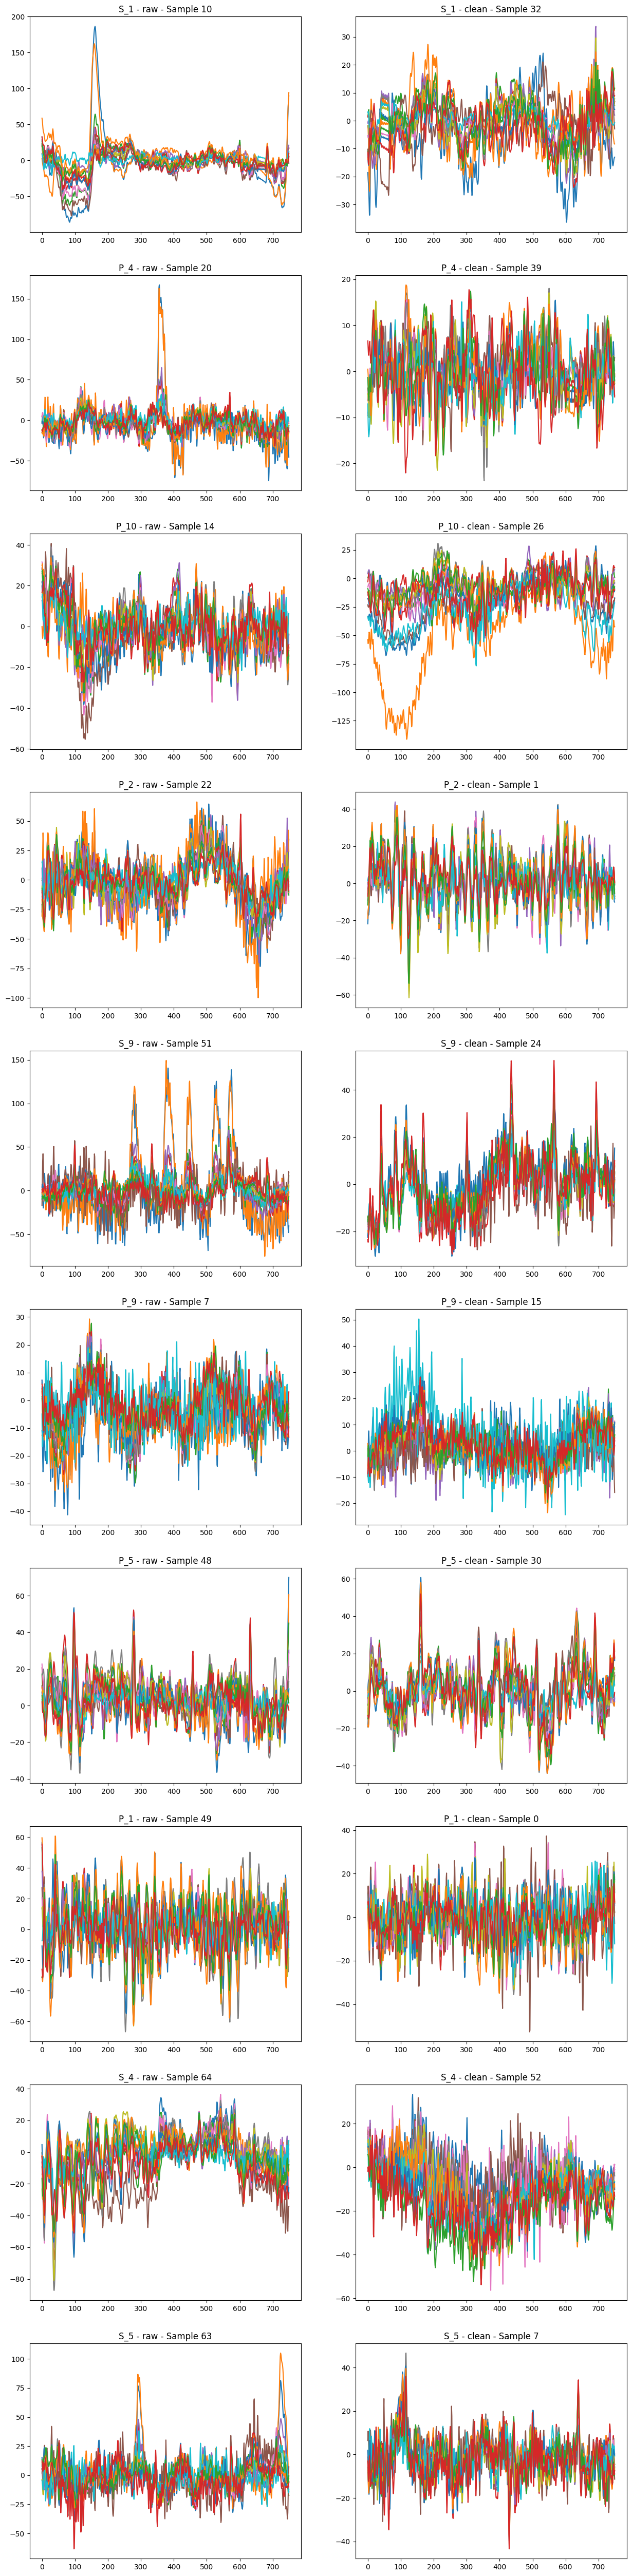

In [9]:
np.random.seed(seed)

# take 10 different random samples from X_raw and X_clean
num_files = 10
file_indices = np.random.choice(np.arange(len(X_raw)), size=num_files, replace=False)

print(file_indices)

seed += 1

# plot the samples side by side

num_graphs = len(file_indices) * 2  # Compute the number of graphs to plot
num_rows = (num_graphs + 1) // 2  # Compute the number of subplot rows

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.subplots_adjust(top=1.1)

raw_counter = 0
clean_counter = 0

for i in range(num_graphs):
    # Check if raw_counter or clean_counter exceeds the available indices
    if raw_counter >= len(file_indices):
        raw_sample = None
    else:
        raw_sample = np.random.randint(0, X_raw[file_indices[raw_counter]].shape[0] - 1)
    
    if clean_counter >= len(file_indices):
        clean_sample = None
    else:
        clean_sample = np.random.randint(0, X_clean[file_indices[clean_counter]].shape[0] - 1)
    
    # Plot the sample if it is not None
    if i % 2 == 0 and raw_sample is not None:
        plot_sample(X_raw[file_indices[raw_counter]], raw_sample, axes[i // 2, i % 2], 
                    title=file_list[file_indices[raw_counter]].split('/')[-1][:-4] + " - raw")
        raw_counter += 1
    elif i % 2 == 1 and clean_sample is not None:
        plot_sample(X_clean[file_indices[clean_counter]], clean_sample, axes[i // 2, i % 2], 
                    title=file_list[file_indices[clean_counter]].split('/')[-1][:-4] + " - clean")
        clean_counter += 1

plt.show()
